# 猫狗分类 cats vs dogs
## 目录
<font size=4>[一、课程摘要](#abstract)</font>

<font size=4>[二、加载library](#library)</font>

<font size=4>[三、加载数据集](#dataset)</font>

<font size=4>[四、图片预处理](#pre)</font>

<font size=4>[五、卷积神经网络](#cnn)</font>

<font size=4>[六、神经网络训练、权重加载、预测](#train)</font>

<font size=4>[七、使用AlexNet预测](#alexnet)</font>

<font size=4>[八、总结](#summary)</font>

<span id="abstract"></span>
## 一、课程摘要
   对于图片的分类问题有许多可以选择的算法，譬如之前的课程中我们使用随机森林算法进行手写数字的识别，当时我们使用的是图片的原生特征，即像素本身，而没有进行图片对比对、物体边缘等高级特征的提取。直接使用原生特征会遇到选用的核函数维度过高，过复杂的困难。（核函数：是映射关系的内积，映射函数本身仅仅是一种映射关系，并没有增加维度的特性，不过可以利用核函数的特性，构造可以增加维度的核函数）
   
   在深度学习占领视觉领域之前，很多视觉模型是基于高级特征（角点、边缘、连通性、亮度和色彩梯等（下文有说明））提取+SVM 的方式实现的。
   
   这一课我们将使用卷积神经网络，利用卷积操作提取出图片中的特征用于模型的训练。
![image.png](./refpic/cat-dog.png)


表述一张图像可以由二维矩阵表示，如果一个二维矩阵就表示为灰度图，三个二维矩阵就是RGB图，每一个点是一个像素值，这是图像的低级特征，图像低级特征的互相关系，会产生许多高级特征，比如角点、边缘等。低级特征会存在图片不同像素值在图片中的位置、大小、方位、光线等影响，但是高级特征具有一定的恒定性，不容易受这些因素影响，所以我们能提取高级特征就能够做到一定程度的图像识别。


#### 1.角点（Corner Point)
   角点就是极值点，即在某方面属性特别突出的点，是在某些属性上强度最大或者最小的孤立点、线段的终点。 对于图像而言，如图所示圆圈内的部分，即为图像的角点，其是物体轮廓线的连接点。角点是图像很重要的特征，对图像图形的理解和分析有很重要的作用。角点在保留图像图形重要特征的同时,可以有效减少信息数据量、提高信息含量、提高计算速度，有利于图像的可靠匹配，使得实时处理成为可能。
![image.png](./refpic/cornerpoint.png)


#### 2.边缘
我们人类视觉对于物体的识别依赖于物体边缘的判定。因此，物体边缘是图像中最基本也是最重要的特征，图像识别、理解的第一步就是边缘检测。什么是边缘呢？边缘在图像处理中并没有严格精确的定义。一般认为：两个具有不同灰度的均匀图像区域的边界称为边缘。沿边缘方向的灰度变化比较平缓，而边缘法线方向的灰度变化比较剧烈。
![image.png](./refpic/bianyuan.png)


#### 3.邻域
相邻像素有三种关系：4邻域、D邻域、8邻域。
##### 1）4邻域
位于坐标(x,y)的一个像素p有4个水平和垂直的相邻像素，其坐标由下式给出：

$$(x+1,y),(x-1,y),(x,y+1),(x,y-1)$$ 

这个像素被称为$p$的4领域用$N_4(p)$表示。每个像素距$(x,y)$一个单位距离，如果$(x,y)$位于图像变截，则$p$的某一领像素位于数字图像的外部。
![](./refpic/4ly.png)  

##### 2）D邻域
位于坐标(x,y)的一个像素p有4个对角的相邻像素，其坐标由下式给出：

$$(x+1,y+1),(x+1,y-1),(x-1,y+1),(x-1,y-1)$$ 

这个像素被称为$p$的D邻域用$N_D(p)$表示。
![](./refpic/Dly.png)  

##### 3)8邻域
4邻域和D邻域一起把这些点叫做p的8邻域，用$N_8(p)$表示。与前边一样，如果$(x,y)$位于图像的边界，则$N_D(p)$ 和 $N_8(p)$中的某些点落入图像的外边。
![](./refpic/8ly.png)  


#### 4.连通性
连通性是描述区域和边界的重要概念，两个像素连通的两个必要条件是：两个像素的位置是否相邻。两个像素的灰度值是否满足特定的相似性准则（或者是否相等）。
##### 1）4连通
对于具有值$V$的像素$p$和$q$，如果$q$在集合$N_4(p)$中，则称这两个像素是4连通的
![image.png](./refpic/liantong1.png)
##### 2）8连通
对于具有值$V$的像素$p$和$q$，如果$q$在集合$N_8(p)$中，则称这两个像素是8连通的
![image.png](./refpic/liantong2.png)
##### 3）m连通
对于具有值$V$的像素$p$和$q$，如果:
I. $q$在集合$N_4(p)$中，或
II. $q$在集合$N_D(p)$中，并且$N_4(p)$与$N_4(q)$的交集为空（没有值$V$的像素）,则称两个像素是m连通的，即4连通和D连通的混合连通。
![image.png](./refpic/liantong3.png)

#### 5.亮度
图像亮度通俗理解便是图像的明暗程度。亮度形容彩色图像，灰度形容灰色图像

#### 6.图像梯度

可以把图像看成二维离散函数，图像梯度其实就是这个二维离散函数的近似求导。

<span id="library"></span>
## 二、加载library

请提前配置好CUDA和Cudnn，以下所有的代码都在GPU下运行

In [1]:
# 加载所需要的库
#数据集
%matplotlib inline
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import shutil
import torch.optim as optim
import hiddenlayer as hl
from torch.autograd import Variable
from torch.utils.data import Dataset
from torchvision import transforms, datasets, models
from torchvision.transforms import ToPILImage  # 显示图片使用
from matplotlib import pyplot as plt
from PIL import Image

<span id="dataset"></span>
## 三、加载数据集
* 在Kaggle网站 [dogs vs cats 数据集](https://www.kaggle.com/c/dogs-vs-cats/data) 下载好数据集 

* 数据集组成由一个train、test、以及submission组成。train 是训练的图片文件，由12500个猫图片和12500个狗图片组成。

* 我们的数据集train的文件名是以type.num.jpg这样的方式命名的，比如cat.0.jpg
测试集test是用来测试的图片，最终结果仿照 submission 的格式（由 id,label 组成，id是图片的编号，label是预测为狗的概率）最终网络把test文件夹图片进行预测并在kaggle上提交

* 下载好数据后进行数据加载,教程中目录下`/data/train/`存有30张猫图片和30张狗图片作为参考
![image.png](./refpic/index.png)

* 加载好数据集后，我们顺势就划分训练集和测试集

In [3]:
# 加载数据集 ，构造dataset继承类
# 随机种子设置
random_state = 42
np.random.seed(random_state)

# kaggle原始数据集地址
original_dataset_dir = './data/train'
total_num = int(len(os.listdir(original_dataset_dir)) / 2)
random_idx = np.array(range(total_num))
np.random.shuffle(random_idx)

# 待处理的数据集地址
base_dir = './data/pre_data'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)
    
#训练集、测试集的划分
sub_dirs = ['train', 'test']
animals = ['cats', 'dogs']
train_idx = random_idx[:int(total_num * 0.9)]
test_idx = random_idx[int(total_num * 0.9):]
numbers = [train_idx, test_idx]
for idx, sub_dir in enumerate(sub_dirs):
    dir = os.path.join(base_dir, sub_dir)
    if not os.path.exists(dir):
        os.mkdir(dir)
    for animal in animals:
        animal_dir = os.path.join(dir, animal)  #
        if not os.path.exists(animal_dir):
            os.mkdir(animal_dir)
        fnames = [animal[:-1] + '.{}.jpg'.format(i) for i in numbers[idx]]
        for fname in fnames:
            src = os.path.join(original_dataset_dir, fname)
            dst = os.path.join(animal_dir, fname)
            shutil.copyfile(src, dst)

        # 验证训练集、验证集、测试集的划分的照片数目
        print(animal_dir + ' total images : %d' %
              (len(os.listdir(animal_dir))))
# 配置参数
random_state = 1
torch.manual_seed(random_state)  # 设置随机数种子，确保结果可重复
torch.cuda.manual_seed(random_state)
torch.cuda.manual_seed_all(random_state)
np.random.seed(random_state)
# random.seed(random_state)
use_gpu = torch.cuda.is_available()
if use_gpu:
    epochs = 10  # 训练次数
else:
    epochs = 4
batch_size = 4  # 批处理大小
num_workers = 4  # 多线程的数目
use_gpu = torch.cuda.is_available()
PATH = '.\checkpoints\model.pth'

./data/pre_data\train\cats total images : 11250
./data/pre_data\train\dogs total images : 11250
./data/pre_data\test\cats total images : 1250
./data/pre_data\test\dogs total images : 1250


<span id="pre"></span>
## 四、图片预处理

### 为什么图片需要预处理？
1.基于已有图片集，通过颜色、亮度、方向、剪裁等方法，生成更多的训练样本。

2.减少模型对于训练集中特殊的位置、角度等无关因素过拟合。

### 预处理的过程是什么
1.颜色失真（color distortion) 

通过对光强（brightness），对比度（contrast），饱和度（saturation），色调（hue）的改变进行图像处理


2.裁剪（cropping）

一般是随机裁剪（RandomCropping)，对图片进行随机裁剪，将大图片变成小图片，更加关注特征

3.翻转（flipping）

翻转，一般是将图片左右翻转。

### 预处理对于训练数据集和测试数据集的区别？

对于训练数据集，会做这些随机的变换，以减少图片中非关键因素对于模型的影响，变换操作使用的参数对于每次训练以及不同的训练图片可能会有不同；对于测试数据集，一般只进行尺寸调整等操作，不会进行左右翻转这些变换。

In [4]:
########################## Question 1 ##########################
'''
    要求:
    预处理图像，以及加载为dataset和dataloader中
    提示：
    dataset(root=路径，transform=参数)、
    dataloader(dataset对象，batch_size,shuffle=打乱)
     一般来说为了让数据集不至于相同类别集群，会打乱数据
'''
##################### Start For Your Code #####################
# 对加载的图像作归一化处理， 并裁剪为[224x224x3]大小的图像
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
train_path = './data/pre_data/train'
train_dataset = datasets.ImageFolder(root = train_path,
                                     transform=data_transform)
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           num_workers=num_workers)
test_dataset = datasets.ImageFolder(root='./data/pre_data/test',
                                    transform=data_transform)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=num_workers)
#####################  End For Your Code  #####################

In [5]:
# 数据集情况展示 （猫和狗的样本数量、图片尺寸等，展示部分图片）
print("猫狗总共:" + str(len(train_dataset)) + "，各占一半")
raw_dataset = datasets.ImageFolder(root='./data/pre_data/train',
                                   transform=None)

猫狗总共:22500，各占一半


(500, 347)


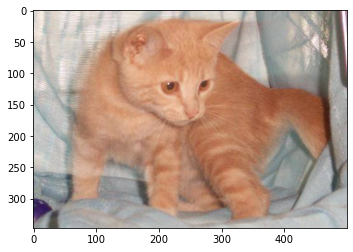

In [6]:
# 挑选猫原图片
raw_img, label = raw_dataset.__getitem__(11000)
print(raw_img.size)  # 图片尺寸
plt.imshow(raw_img)

(500, 384)


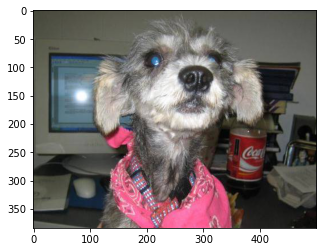

In [7]:
# 挑选狗原图片
raw_img, label = raw_dataset.__getitem__(20000)
print(raw_img.size)  # 图片尺寸
plt.imshow(raw_img)

torch.Size([3, 224, 224])
0


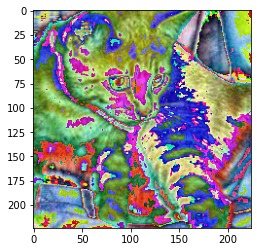

In [8]:
# 图像预处理部分在Question2 处
img_tensor, label = train_dataset.__getitem__(11000)
print(img_tensor.shape)  # 图片尺寸
img = ToPILImage()(img_tensor)  # 转化为PIL image
plt.imshow(img)
print(label)  # 0为猫 1为狗

1


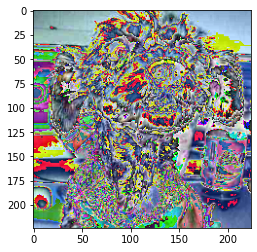

In [9]:
# 数据集情况展示 （猫和狗的样本数量、图片尺寸等，展示部分图片）
img_tensor, label = train_dataset.__getitem__(20000)
img = ToPILImage()(img_tensor)  # 转化为PIL image
plt.imshow(img)
print(label)  # 0为猫 1为狗

<span id="cnn"></span>
## 五、卷积神经网络

1.全连接神经网络与卷积神经网络的结构差别

首先是全连接神经网络

![全连接神经网络](./refpic/FCN.png)

卷积神经网络 Lenet 风格

![卷积神经网络](./refpic/lenet.png)

卷积神经网络是近年来深度学习能在计算机视觉领域取得突破性成果的基石。它也逐渐在被其他诸如自然语言处理、推荐系统和语音识别等领域广泛使用。

#### 1.神经元
神经网络由大量神经元组成，如下图，神经元是接受输入进行线性加和的单位，输入的神经元的线与之前神经元进行权重乘积，神经元的输出可以是激活函数激活后的输出。比如之前使用的ReLU函数: $$output = max(0,x)$$, 达到正数的时候才激活。给线性的x增加了非线性的维度。
![神经元](./refpic/netunit.png)

#### 2.输入层
输入层是原始输入，对于图片来讲就是输入的一张图片的张量数据。张量的概念可以简单的理解为，0阶张量就是标量，1阶张量就是向量，2阶张量就是矩阵，3阶张量就是多个矩阵拼在一起。

#### 3.权重
权重是神经网络学习的模式，具体表现在每次神经元输入都与前一个神经元进行乘积。

#### 4.输出层
对于分类问题，输出层是进行分类的层，一般来说使用softmax作为激活函数，对不同类别进行概率估计。

#### 5.隐藏层
见全连接神经网络的hidden layer，隐藏层的意义就是把输入数据的特征，抽象到另一个维度空间，来展现其更抽象化的特征，这些特征能更好的进行线性划分。多个隐藏层其实是对输入特征多层次的抽象，最终的目的就是为了更好的线性划分不同类型的数据。


#### 6.激活函数
引入非线性的激活函数，使得神经网络能够学习到非线性的特征。


#### 7.卷积层
卷积神经网络是含有卷积层的神经网络，卷积层有高和宽两个空间维度，常用来处理图像数据。
神经网络意义上的卷积与数学上的卷积不是完全相同的概念。

神经网络上的卷积是卷积运算，通常指的是互相关(cross-correlation)运算。在二维卷积层中，一个二维输入数组和一个二维**核（kernel）**数组通过互相关运算输出一个二维数组。我们用一个具体例子来解释二维互相关运算的含义。如图所示，输入是一个高和宽均为$3$的二维数组。我们将该数组的形状记为$3×3$或$（3，3）$。核数组的高和宽分别为$2$。该数组在卷积计算中又称卷积核或过滤器（filter）。卷积核窗口（又称卷积窗口）的形状取决于卷积核的高和宽，即$2×2$。下图中的阴影部分为第一个输出元素及其计算所使用的输入和核数组元素：$0×0+1×1+3×2+4×3=19 $。 
![](./refpic/conv.png)
而神经网络学习的参数就是这个卷积核，这个卷积核通过对图片矩阵的运算，得出特征图。

#### 8. 特征图和感受野
二维卷积层输出的二维数组可以看作是输入在空间维度（宽和高）上某一级的表征，也叫特征图（feature map）。影响元素x的前向计算的所有可能输入区域（可能大于输入的实际尺寸）叫做$x$的感受野（receptive field）。  
以上图为例，输入中阴影部分的四个元素是输出中阴影部分元素的感受野。我们将上图中形状为$2×2$的输出记为$Y$，并考虑一个更深的卷积神经网络：将$Y$与另一个形状为$2×2$的核数组做互相关运算，输出单个元素$z$。那么，$z$在$Y$上的感受野包括$Y$的全部四个元素，在输入上的感受野包括其中全部9个元素。可见，我们可以通过更深的卷积神经网络使特征图中单个元素的感受野变得更加广阔，从而捕捉输入上更大尺寸的特征。

#### 9. padding 填充
填充（padding）是指在输入高和宽的两侧填充元素（通常是$0$元素）。如图我们在原输入高和宽的两侧分别添加了值为$0$的元素，使得输入高和宽从$3$变成了$5$，并导致输出高和宽由$2$增加到$4$。图中的阴影部分为第一个输出元素及其计算所使用的输入和核数组元素：$ 0×0+0×1+0×2+0×3=0 $。
![](./refpic/padding.png)
一般来说，如果在高的两侧一共填充$ph$行，在宽的两侧一共填充$pw$列，那么输出形状将会是

$$(nh−kh+ph+1)×(nw−kw+pw+1)$$,
也就是说，输出的高和宽会分别增加$ph$和$pw$。($nh$、$nw$为原图的高、宽, $kh$、$kw$为核的高、宽)

在很多情况下，我们会设置$ph=kh−1$和$pw=kw−1$来使输入和输出具有相同的高和宽。这样会方便在构造网络时推测每个层的输出形状。假设这里$kh$是奇数，我们会在高的两侧分别填充$ph/2$行。如果$kh$是偶数，一种可能是在输入的顶端一侧填充$⌈ph/2⌉$（取上整数）行，而在底端一侧填充$⌊ph/2⌋$（取下整数）行。在宽的两侧填充同理。

卷积神经网络经常使用奇数高宽的卷积核，如$1$、$3$、$5$和$7$，所以两端上的填充个数相等。对任意的二维数组$X$，设它的第$i$行第$j$列的元素为$X[i,j]$。当两端上的填充个数相等，并使输入和输出具有相同的高和宽时，我们就知道输出$Y[i,j]$是由输入以$X[i,j]$为中心的窗口同卷积核进行互相关计算得到的。

#### 10. channel 通道
之前我们用到的输入和输出都是二维数组，但真实数据的维度经常更高，彩色图像在高和宽2个维度外还有RGB（红、绿、蓝）3个颜色通道。表示为一个 $( 3 \times h \times w )$ 的多维数组。我们将大小为3的这一维度称为通道(channel)维。本节我们将介绍含多个输入通道或多个输出通道的卷积核。
##### 10.1 多输入通道
当输入为一个多通道的时候，我们用相同通道数的核对其不同的通道分别进行乘法，对乘后的新矩阵进行矩阵加法，得到了卷积核运算之后的新矩阵
![](./refpic/multyInputchannel.png)

##### 10.2 多输出通道
当输出为多个通道时候，我们令输出通道数$C_{out}$，输入通道数为$C_{in}$，那么核的shape为 $C_{out} \times \ C_{in} \times h \times w $ ，如图使用输入通道数为3，输出通道数为2的矩阵的情况。
![](./refpic/outchannel.png)

#### 11.池化
实际图像中，我们感兴趣的物体不会出现在固定的位置，这也会导致同一个边缘对应的输出可能出现在卷积输出$Y$中的不同的位置，进而对后面的模式识别造成不便，而池化的提出，是为了缓解卷积层对位置的过度敏感性。

同卷积层一样，池化层每次对输入数据的一个固定形状窗口（又称池化窗口）中的元素计算输出。不同于卷积层里计算输入和核的互相关性，池化层直接计算池化窗口内元素的最大值或者平均值。该运算也分别叫做最大池化或平均池化。在二维最大池化中，池化窗口从输入数组的最左上方开始，按从左往右、从上往下的顺序，依次在输入数组上滑动。当池化窗口滑动到某一位置时，窗口中的输入子数组的最大值即输出数组中相应位置的元素。
![](./refpic/pooling.png)


In [10]:
# 自己简单的CNN模型
# 创建模型
########################## Question 2 ##########################
'''
    要求：
    创建两层卷积层的简单分类神经网络

    提示：
    填入分类数目，最后一层为分类数目
'''
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.c2d = nn.Conv2d(3, 6, 5)
        self.features = nn.Sequential(nn.ReLU(), nn.MaxPool2d(2, 2),
                                      nn.Conv2d(6, 16, 5), nn.ReLU(),
                                      nn.MaxPool2d(2, 2))
        self.classifier = nn.Sequential(nn.Linear(16 * 53 * 53, 1024),
                                        nn.ReLU(), nn.Linear(1024, 512),
##################### Start For Your Code #####################
                                        nn.ReLU(), nn.Linear(512,2))
#####################  End For Your Code  #####################
    def forward(self, x):
        x0 = self.c2d(x)
        x1 = self.features(x0)
        self.feature_map = x0
        x2 = x1.view(x1.size(0), -1)
        x3 = self.classifier(x2)
        return x3

    def save(self, name=None):
        if name is None:
            prefix = 'checkpoints/' + "CNN" + '_'
            name = time.strftime(prefix + '%m%d_%H:%M:%S.pth')
        else:
            prefix = 'checkpoints/' + "CNN" + '_'
            name = prefix + name + ".pth"
        torch.save(self.state_dict(), name)
        return name
net = Net()

if use_gpu:
    net = net.cuda()
print(net)

Net(
  (c2d): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (features): Sequential(
    (0): ReLU()
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=44944, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=2, bias=True)
  )
)


该网络由简单的2层卷积层然后密集层分类构成的

<span id="train"></span>
## 六、神经网络训练、权重加载、预测

### 代价函数
损失函数（loss function）或代价函数（cost function）是将随机事件或其有关随机变量的取值映射为非负实数以表示该随机事件的“风险”或“损失”的函数。在应用中，损失函数通常作为学习准则与优化问题相联系，即通过最小化损失函数求解和评估模型。

### 最小化代价函数
最小化代价函数就是逐渐逼近代价函数的目标。

### 梯度
梯度的本意是一个向量（矢量），表示某一函数在该点处的方向导数沿着该方向取得最大值，即函数在该点处沿着该方向（此梯度的方向）变化最快，变化率最大（为该梯度的模）。神经网络通过梯度下降来进行最小化代价函数。


D:\Softwares\programfiles\anaconda\envs\pytorch\lib\site-packages\hiddenlayer\canvas.py:218: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self.figure.add_subplot(self.gs, projection="3d")
D:\Softwares\programfiles\anaconda\envs\pytorch\lib\site-packages\hiddenlayer\canvas.py:255: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(metric.formatted_steps[-limit:])
D:\Softwares\programfiles\anaconda\envs\pytorch\lib\site-packages\hiddenlayer\canvas.py:137: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  gs.tight_layout(self.figure, rect=(0, 0, 1, 1-head_pad))


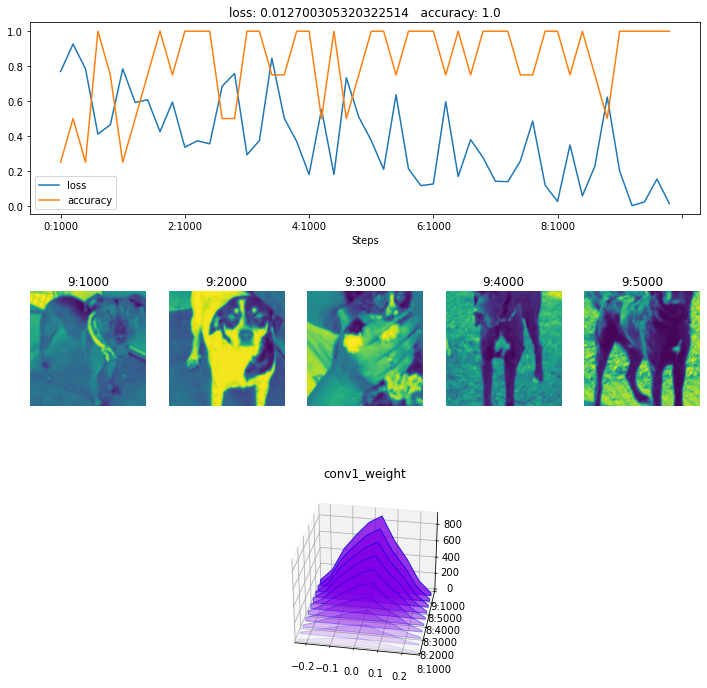

train 10 epoch loss: 0.023  acc: 96.840 
test  10 epoch loss: 0.201  acc: 74.720 
训练结束...


In [13]:
# 加载、训练自己搭建的CNN模型
########################## Question 3 ##########################
'''
    要求：
    完整搭建神经网络，由于在第五课已经学习过了完整的神经网络结构，
    现在要求自己独立进行搭建。
    使用hiddenlayer可视化过程，给出每个epoch的loss和acc
    提示：
    1.补全使用gpu的cuda()函数
    2.补全正确率个数计算，预测与标签相同说明正确
'''

##################### Start For Your Code #####################
# step0 : 指定GPU
import os
if use_gpu:
    os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# 定义loss和optimizer
cirterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)
history = hl.History()
canvas = hl.Canvas()
def train():
    print("训练开始...")
    for epoch in range(epochs):
        running_loss = 0.0
        train_correct = 0
        train_total = 0
        for i, data in enumerate(train_loader, 0):
            step = (epoch, i)
            inputs, train_labels = data
            if use_gpu:
                inputs, labels = Variable(inputs.cuda()),Variable(train_labels.cuda())
            else:
                inputs, labels = Variable(inputs), Variable(train_labels)
            optimizer.zero_grad()
            outputs = net(inputs)
            _, train_predicted = torch.max(outputs.data, 1)
            train_correct += (train_predicted == labels.data).sum()
            loss = cirterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            train_total += train_labels.size(0)
            # 使用hiddenlayer package展示10 step training
            if i and i % 1000 == 0:
                # Compute accuracy
                pred_labels = np.argmax(outputs.detach().cpu().numpy(), 1)
                accuracy = np.mean(
                    pred_labels == labels.detach().cpu().numpy())
                # Log metrics to history
                history.log(
                    (epoch, i),
                    loss=loss,
                    accuracy=accuracy,
                    conv1_weight=net.c2d.weight,
                    feature_map=net.feature_map[0, 1].detach().cpu().numpy())
                # Visualize metrics
                with canvas:
                    canvas.draw_plot([history["loss"], history["accuracy"]])
                    canvas.draw_image(history["feature_map"])
                    canvas.draw_hist(history["conv1_weight"])
        print('train %d epoch loss: %.3f  acc: %.3f ' %
              (epoch + 1, running_loss / train_total,
               100 * train_correct / train_total))
        # 模型测试
        correct = 0
        test_loss = 0.0
        test_total = 0
        net.eval()
        for data in test_loader:
            images, labels = data
            if use_gpu:
                images, labels = Variable(images.cuda()), Variable(
                    labels.cuda())
            else:
                images, labels = Variable(images), Variable(labels)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            loss = cirterion(outputs, labels)
            test_loss += loss.item()
            test_total += labels.size(0)
            correct += (predicted == labels.data).sum()

        print('test  %d epoch loss: %.3f  acc: %.3f ' %
              (epoch + 1, test_loss / test_total, 100 * correct / test_total))

    net.save(str(epochs))
    print("训练结束...")


train()
#####################  End For Your Code  #####################

因为pytorch版本存在不兼容缘故，在此不让大家将torch版本改为1.3.0，只展示网络可视化结果  
![](./refpic/result1.png)
1. 第一个坐标系的横坐标代表 (epoch：图片的张数）,纵坐标是acc和loss的值
2. 第二行图片是图片在第一层feature map表示
3. 第三幅图片是权重直方图

由于训练的时间比较长，只展示10步训练过程。

训练好的模型已经被保存到checkpoint，后续直接调用。

**介绍checkpoint** :
checkpoint 保存了某一步骤的神经网络权重、梯度等信息。使用checkpoint可以经过加载得到训练到某一程度的神经网络，可以在此基础上进行再训练，或者保存某一epoch的训练结果。


In [14]:
ls ./checkpoints

参数格式不正确 - "checkpoints"。


In [15]:
########################## Question 4 ##########################
'''
    要求：
    使用训练后得到的checkpoints，进行权重读取，进一步训练或者测试
    提示：
    torch.load()方法
'''
##################### Start For Your Code #####################
#  加载checkpoint
net = Net()
if torch.cuda.is_available():
    net.load_state_dict(torch.load("./checkpoints/CNN_10.pth"))
    net = net.cuda()
else:
    net.load_state_dict(torch.load("./checkpoints/CNN_10.pth",map_location=torch.device('cpu')))
#####################  End For Your Code  #####################
# 模型测试
correct = 0
test_loss = 0.0
test_total = 0
net.eval()
print("开始测试...")
for data in test_loader:
    images, labels = data
    if use_gpu:
        images, labels = Variable(images.cuda()), Variable(labels.cuda())
    else:
        images, labels = Variable(images), Variable(labels)
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    loss = cirterion(outputs, labels)
    test_loss += loss.item()
    test_total += labels.size(0)
    correct += (predicted == labels.data).sum()
print('test  loss: %.3f  acc: %.3f ' %
      (test_loss / test_total, 100 * correct / test_total))
print("测试结束...")

开始测试...
test  loss: 0.201  acc: 74.720 
测试结束...


#### 根据预测结果，评估模型的表现 ####

根据预测结果我们可以发现模型的对于验证集的数据集精准度较差，说明模型的泛化能力较弱。下面让我们尝试AlexNet。

<span id="alexnet"></span>
## 七、使用AlexNet预测

![](./refpic/alexnet.png)
AlexNet是2012年ImageNet竞赛冠军获得者Hinton和他的学生Alex Krizhevsky设计的。也是在那年之后，更多的更深的神经网络被提出，比如优秀的vgg,GoogLeNet。 这对于传统的机器学习分类算法而言，已经相当的出色。

AlexNet中包含了几个比较新的技术点，也首次在CNN中成功应用了ReLU、Dropout和LRN等Trick。同时AlexNet也使用了GPU进行运算加速。  
AlexNet将LeNet的思想发扬光大，把CNN的基本原理应用到了很深很宽的网络中。AlexNet主要使用到的新技术点如下：  
（1）成功使用ReLU作为CNN的激活函数，并验证其效果在较深的网络超过了Sigmoid，成功解决了Sigmoid在网络较深时的梯度弥散问题。虽然ReLU激活函数在很久之前就被提出了，但是直到AlexNet的出现才将其发扬光大。  
（2）训练时使用Dropout随机忽略一部分神经元，以避免模型过拟合。Dropout虽有单独的论文论述，但是AlexNet将其实用化，通过实践证实了它的效果。在AlexNet中主要是最后几个全连接层使用了Dropout。  
（3）在CNN中使用重叠的最大池化。此前CNN中普遍使用平均池化，AlexNet全部使用最大池化，避免平均池化的模糊化效果。并且AlexNet中提出让步长比池化核的尺寸小，这样池化层的输出之间会有重叠和覆盖，提升了特征的丰富性。  
（4）提出了LRN层，对局部神经元的活动创建竞争机制，使得其中响应比较大的值变得相对更大，并抑制其他反馈较小的神经元，增强了模型的泛化能力。  
（5）使用CUDA加速深度卷积网络的训练，利用GPU强大的并行计算能力，处理神经网络训练时大量的矩阵运算。AlexNet使用了两块GTX 580 GPU进行训练，单个GTX 580只有3GB显存，这限制了可训练的网络的最大规模。因此作者将AlexNet分布在两个GPU上，在每个GPU的显存中储存一半的神经元的参数。因为GPU之间通信方便，可以互相访问显存，而不需要通过主机内存，所以同时使用多块GPU也是非常高效的。同时，AlexNet的设计让GPU之间的通信只在网络的某些层进行，控制了通信的性能损耗。   
（6）数据增强，随机地从256*256的原始图像中截取224*224大小的区域（以及水平翻转的镜像），相当于增加了2*(256-224)^2=2048倍的数据量。如果没有数据增强，仅靠原始的数据量，参数众多的CNN会陷入过拟合中，使用了数据增强后可以大大减轻过拟合，提升泛化能力。进行预测时，则是取图片的四个角加中间共5个位置，并进行左右翻转，一共获得10张图片，对他们进行预测并对10次结果求均值。同时，AlexNet论文中提到了会对图像的RGB数据进行PCA处理，并对主成分做一个标准差为0.1的高斯扰动，增加一些噪声，这个Trick可以让错误率再下降1%。  
  

我们尝试用这一模型进行测试，看一下效果如何。

同学们有兴趣的可以尝试一下训练，没有兴趣的直接跳过训练load模型

In [16]:
# 加载alexnet
import torchvision.models as models

# 导入Pytorch所封装的AlexNet模型
alexNet = models.alexnet(pretrained=False)
if torch.cuda.is_available():
    alexNet.load_state_dict(torch.load("./checkpoints/alexnet-premodel.pth"))
else:
    alexNet.load_state_dict(torch.load("./checkpoints/alexnet-premodel.pth",map_location=torch.device('cpu')))
########################## Question 5 ##########################
'''
    要求：
    加载alexnet 并且使用在文件夹中下载好的预训练模型，更改alexnet变为二分类网络
    提示：
    改变最后一层的分类个数
'''
##################### Start For Your Code #####################
alexNet.classifier[6] = nn.Linear(4096, 2)
#################### Answer For Reference #####################
if use_gpu:
    alexNet.cuda()
print(alexNet)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [17]:
# 定义loss和optimizer
cirterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(alexNet.parameters(), lr=0.0001, momentum=0.9)

def Alextrain():
    print("训练开始...")
    for epoch in range(epochs):
        running_loss = 0.0
        train_correct = 0
        train_total = 0
        for i, data in enumerate(train_loader, 0):
            step = (epoch, i)
            inputs, train_labels = data
            if use_gpu:
                inputs, labels = Variable(inputs.cuda()), Variable(
                    train_labels.cuda())
            else:
                inputs, labels = Variable(inputs), Variable(train_labels)
            optimizer.zero_grad()
            outputs = alexNet(inputs)
            _, train_predicted = torch.max(outputs.data, 1)
            train_correct += (train_predicted == labels.data).sum()
            loss = cirterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            train_total += train_labels.size(0)
        print('train %d epoch loss: %.3f  acc: %.3f ' %
              (epoch + 1, running_loss / train_total,
               100 * train_correct / train_total))
        # 模型测试
        correct = 0
        test_loss = 0.0
        test_total = 0
        alexNet.eval()
        for data in test_loader:
            images, labels = data
            if use_gpu:
                images, labels = Variable(images.cuda()), Variable(
                    labels.cuda())
            else:
                images, labels = Variable(images), Variable(labels)
            outputs = alexNet(images)
            _, predicted = torch.max(outputs.data, 1)
            loss = cirterion(outputs, labels)
            test_loss += loss.item()
            test_total += labels.size(0)
            correct += (predicted == labels.data).sum()
        print('test  %d epoch loss: %.3f  acc: %.3f ' %
              (epoch + 1, test_loss / test_total, 100 * correct / test_total))

    torch.save(alexNet.state_dict(),
               "./checkpoints/alexnet_" + str(epochs) + ".pth")
    print("训练结束...")


Alextrain()

训练开始...
train 1 epoch loss: 0.028  acc: 95.471 
test  1 epoch loss: 0.019  acc: 96.880 
train 2 epoch loss: 0.014  acc: 97.769 
test  2 epoch loss: 0.017  acc: 97.200 
train 3 epoch loss: 0.008  acc: 98.764 
test  3 epoch loss: 0.023  acc: 96.680 
train 4 epoch loss: 0.005  acc: 99.391 
test  4 epoch loss: 0.023  acc: 96.960 
train 5 epoch loss: 0.003  acc: 99.729 
test  5 epoch loss: 0.017  acc: 97.800 
train 6 epoch loss: 0.001  acc: 99.898 
test  6 epoch loss: 0.020  acc: 97.360 
train 7 epoch loss: 0.001  acc: 99.916 
test  7 epoch loss: 0.020  acc: 97.840 
train 8 epoch loss: 0.000  acc: 99.978 
test  8 epoch loss: 0.021  acc: 97.800 
train 9 epoch loss: 0.000  acc: 99.996 
test  9 epoch loss: 0.022  acc: 97.920 
train 10 epoch loss: 0.000  acc: 99.996 
test  10 epoch loss: 0.023  acc: 97.920 
训练结束...


![](./refpic/result2.png)

#### 根据预测结果，和自己搭建的模型结果进行对比 ####

训练结果比自己的模型的泛化能力更强，在测试集上表现的更好。

In [18]:
ls ./checkpoints

参数格式不正确 - "checkpoints"。


训练好的模型可以应用到树莓派拍摄的猫狗照片或是用户提供的照片上,下面将图片放到mycat文件夹中。

In [19]:
ls ./data/mycat/data

参数格式不正确 - "data"。


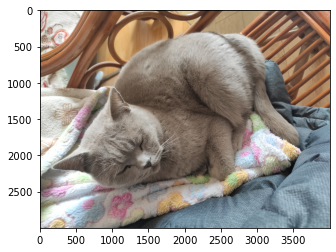

In [20]:
########################## Question 6 ##########################
'''
    要求:
    对用户的图片进行展示
    提示：
    使用 PIL 库
'''
##################### Start For Your Code #####################
# # 非数据库图片获取及读取（树莓派拍摄或是用户上传的照片）
image = Image.open("./data/mycat/data/mycat.jpg")
plt.imshow(image)
#####################  End For Your Code  #####################

In [21]:
# 对非数据库图片进行预处理
# 对加载的图像作归一化处理， 并裁剪为[224x224x3]大小的图像
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

my_dataset = datasets.ImageFolder(root='./data/mycat',
                                  transform=data_transform)
my_loader = torch.utils.data.DataLoader(my_dataset,
                                        batch_size=1,
                                        shuffle=False,
                                        num_workers=0)

#使用自己搭建的模型以及alexnet进行预测
cnn_net = Net()
if torch.cuda.is_available():
    cnn_net.load_state_dict(torch.load("./checkpoints/CNN_10.pth"))
else:
    cnn_net.load_state_dict(torch.load("./checkpoints/CNN_10.pth",map_location=torch.device('cpu')))
print("开始CNN预测")
for data in my_loader:
    images, _ = data
    outputs = cnn_net(images)
    _, predicted = torch.max(outputs.data, 1)
    if predicted == 0:
        print("CNN，预测此图片结果为猫")
    else:
        print("CNN，预测此图片结果为狗")

alexNet = models.alexnet(pretrained=False)
alexNet.classifier[6] = nn.Linear(4096, 2)
if torch.cuda.is_available():
    alexNet.load_state_dict(torch.load("./checkpoints/alexnet_10.pth"))
else:
    alexNet.load_state_dict(torch.load("./checkpoints/alexnet_10.pth",map_location=torch.device('cpu')))
print("开始AlexNet预测")
for data in my_loader:
    images, _ = data
    outputs = alexNet(images)
    _, predicted = torch.max(outputs.data, 1)
    if predicted == 0:
        print("AlexNet，预测此图片结果为猫")
    else:
        print("AlexNet，预测此图片结果为狗")

开始CNN预测
CNN，预测此图片结果为猫
开始AlexNet预测
AlexNet，预测此图片结果为狗


<span id="summary"></span>
## 八、总结

本文通过猫狗大战这一项实验，介绍了基本的CNN网络相关概念，以及CNN网络的训练范式。总结一下本文讲了的知识点。  
1.图像的入门知识，角点，邻域等。  
2.数据集的载入api使用。    
3.数据集的分类。  
4.数据增强。  
5.卷积神经网络及卷积神经网络相关知识。
6.卷积神经网络的训练过程。checkpoint加载、预测等。  
7.AlexNet网络。  